In [9]:
'''
Title:  Darstellung der Messungen
Author: Kaufmann Stefan
Date:   08.05.2023
'''

# Requirements

# python 3.10.6
import numpy as np
import matplotlib.pyplot as plt
import libopc as libs  
import pandas as pd

import libKosten as libk

# 1. Importieren der Messwerte

In [10]:
#path = "Beispieldaten/"
#path = "1_Messungen/timeoptimal/"
path = "1_Messungen/quad/"
#path = "1_Messungen/energie/"

# Import Files
Quanser_meas_file = pd.read_excel(path+"1.xlsx")  # Phi 1
Quanser_V_file  = pd.read_excel(path+"3.xlsx")    # Input
Quanser_I_file  = pd.read_excel(path+"4.xlsx")    # Input

Quanser_meas_names = Quanser_meas_file.columns.tolist()
Quanser_V_names = Quanser_V_file.columns.tolist()
Quanser_I_names = Quanser_I_file.columns.tolist()

Quanser_meas = np.zeros_like(Quanser_meas_file)
for k in range(np.size(Quanser_meas_names)):
    Quanser_meas[:,k] =  Quanser_meas_file[Quanser_meas_names[k]]


Quanser_V = np.zeros_like(Quanser_V_file)
for k in range(np.size(Quanser_V_names)):
    Quanser_V[:,k] =  Quanser_V_file[Quanser_V_names[k]]

Quanser_I = np.zeros_like(Quanser_I_file)
for k in range(np.size(Quanser_I_names)):
    Quanser_I[:,k] =  Quanser_I_file[Quanser_I_names[k]]



In [ ]:
T_Start = 0
T_Stop = 0

if 'timeoptimal' in path:
    T_Start = 6
    T_Stop = 15

if 'quad' in path:
    T_Start = 3.5
    T_Stop = 4.1

if 'energie' in path:
    T_Start = 0 #1.97
    T_Stop = 10 #2.97

dt = 1/1000

N_Start = int(T_Start/dt)
N_Stop = int(T_Stop/dt)

In [ ]:
k = 8
print(Quanser_meas[N_Start,k+1])
print(Quanser_meas[N_Stop,k+1])

0.0
0.175781


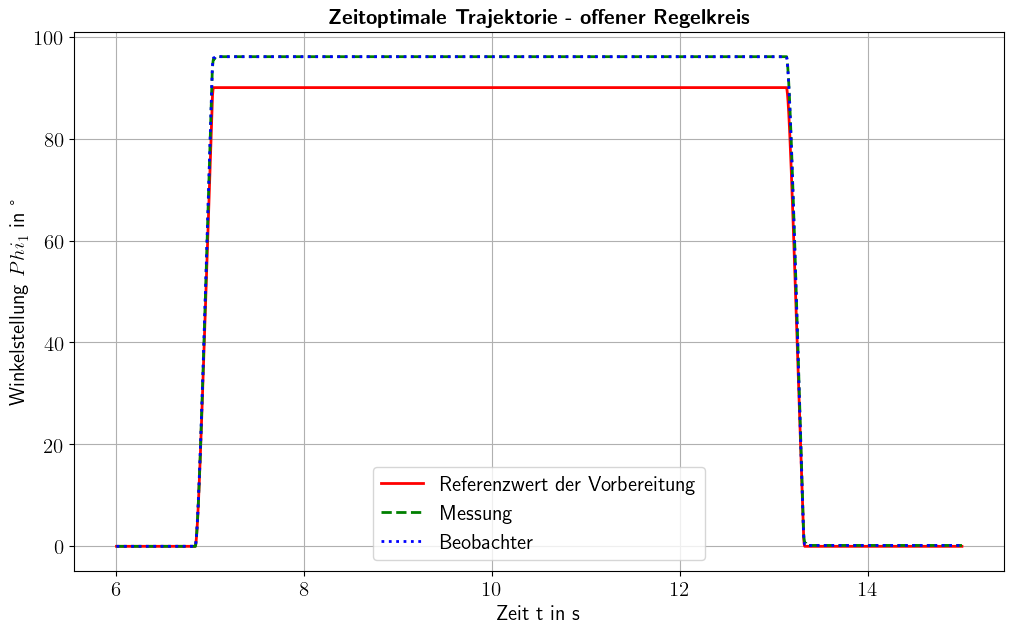

In [ ]:
# Phi 1 

k = 0 
plt.figure(figsize=(12,7))
plt.plot(Quanser_meas[N_Start:N_Stop,k],Quanser_meas[N_Start:N_Stop,k+1], 'r', linewidth ='2', label = 'Referenzwert der Vorbereitung')
plt.plot(Quanser_meas[N_Start:N_Stop,k],Quanser_meas[N_Start:N_Stop,k+9], 'g', linestyle ='--' , linewidth ='2', label = 'Messung')
plt.plot(Quanser_meas[N_Start:N_Stop,k],Quanser_meas[N_Start:N_Stop,k+5], 'b', linestyle =':' , linewidth ='2', label = 'Beobachter')
#plt.plot(Quanser_obs[:,k],Quanser_obs[:,k+1], 'g', linewidth ='2', label = 'observer')
plt.xlabel(r'Zeit t in s')
plt.ylabel(r'Winkelstellung $Phi_ {1}$ in °')
plt.grid()
if 'timeoptimal' in path:
    plt.title(r'\textbf{Zeitoptimale Trajektorie - offener Regelkreis}', fontsize=15)
if 'energie' in path:
    plt.title(r'\textbf{Energieoptimale Trajektorie - offener Regelkreis}', fontsize=15)   
if 'quad' in path:     
    plt.title(r'\textbf{allgemein quadratische Trajektorie - offener Regelkreis}', fontsize=15)   
#plt.axhline(y=90, color='r')
plt.legend(loc = 'best')
plt.savefig(path + "Winkel.svg")
plt.show()




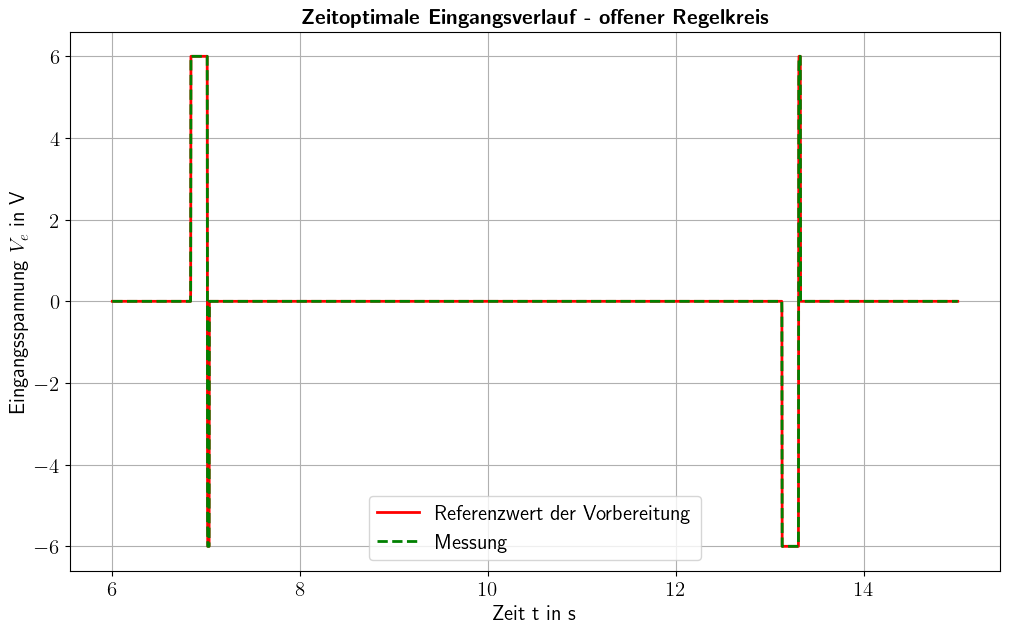

In [ ]:
# Eingang

k = 0 
plt.figure(figsize=(12,7))
plt.plot(Quanser_V[N_Start:N_Stop,k],Quanser_V[N_Start:N_Stop,k+1], 'r', linewidth ='2', label = 'Referenzwert der Vorbereitung')
plt.plot(Quanser_V[N_Start:N_Stop,k],Quanser_V[N_Start:N_Stop,k+3], 'g', linestyle ='--' , linewidth ='2', label = 'Messung')
#plt.plot(Quanser_V[N_Start:N_Stop,k],Quanser_V[N_Start:N_Stop,k+5], 'b', linestyle =':' , linewidth ='4', label = 'Beobachter')



plt.xlabel(r'Zeit t in s')
plt.ylabel(r'Eingangsspannung $V_ {e}$ in V')
plt.grid()
if 'timeoptimal' in path:
    plt.title(r'\textbf{Zeitoptimale Eingangsverlauf - offener Regelkreis}', fontsize=15)    
if 'energie' in path:
    plt.title(r'\textbf{Energieoptimale Eingangsverlauf - offener Regelkreis}', fontsize=15)         
if 'quad' in path:     
    plt.title(r'\textbf{allgemein quadratische Eingangsverlauf - offener Regelkreis}', fontsize=15)   
#plt.axhline(y=90, color='r')
plt.legend(loc = 'best')
plt.savefig(path + "Eingang.svg")
plt.show()



In [ ]:
# Strom

k = 0 
plt.figure(figsize=(12,7))
plt.plot(Quanser_I[N_Start:N_Stop,k],Quanser_I[N_Start:N_Stop,1],  'r', linewidth ='2', label = 'Referenzwert der Vorbereitung')
plt.plot(Quanser_I[N_Start:N_Stop,k+2],Quanser_I[N_Start:N_Stop,3], 'g', linestyle ='--' , linewidth ='2', label = 'Messung')

plt.xlabel(r'Zeit t in s')
plt.ylabel(r'Eingangsspannung $V_ {e}$ in V')
plt.grid()
if 'timeoptimal' in path:
    plt.title(r'\textbf{Zeitoptimale Stromverlauf - offener Regelkreis}', fontsize=15)    
if 'energie' in path:
    plt.title(r'\textbf{Energieoptimale Stromverlauf - offener Regelkreis}', fontsize=15)   
    #print('Kosten soll : ', libk.cost_Scheinleistung(Quanser_I[N_Start:N_Stop,0],Quanser_V[N_Start:N_Stop,k+1]))
    print('Kosten ist  : ', libk.cost_Scheinleistung(Quanser_I[N_Start:N_Stop,3],Quanser_V[N_Start:N_Stop,k+3]))
if 'quad' in path:     
    plt.title(r'\textbf{allgemein quadratische Stromverlauf - offener Regelkreis}', fontsize=15)   
#plt.axhline(y=90, color='r')
plt.legend(loc = 'best')
plt.savefig(path + "Strom.svg")
plt.show()

<IPython.core.display.Javascript object>

# 2. Importiern der Trajektorien 

In [ ]:
'''

with open("1_Daten/20230514__184823_Quad.txt", "r") as file:
    content = file.read()

start_index = content.index("[") + 1
end_index = content.index("]")
N = int(content[start_index:end_index])
print('Anzahl von Aufzählungen',N)

phi_1_ref   = [0.0] * N
omega_1_ref = [0.0] * N
i_ref = [0.0] * N
u_ref = [0.0] * N

index = 0
index2= 0
index3= 0
index4= 0
# Extract values from text
lines = content.split("\n")[8:]
for line in lines:   
    if "phi_1_ref[" in line and index <N-1:        
        index = int(line.split("[")[1].split("]")[0])                 
        value = float(line.split("=")[1].strip().rstrip(";"))        
        phi_1_ref[index] = value
           
    if "omega_1_ref[" in line and index2 <N-1:           
        index2 = int(line.split("[")[1].split("]")[0])                 
        value = float(line.split("=")[1].strip().rstrip(";"))        
        omega_1_ref[index2] = value
    
    if "i_ref[" in line and index3 <N-1:        
        index3 = int(line.split("[")[1].split("]")[0])                 
        value = float(line.split("=")[1].strip().rstrip(";"))        
        omega_1_ref[index3] = value
    
    if "u_ref[" in line and index4 <N-1:        
        index4 = int(line.split("[")[1].split("]")[0])                 
        value = float(line.split("=")[1].strip().rstrip(";"))        
        u_ref[index4] = value
'''

'\n\nwith open("1_Daten/20230514__184823_Quad.txt", "r") as file:\n    content = file.read()\n\nstart_index = content.index("[") + 1\nend_index = content.index("]")\nN = int(content[start_index:end_index])\nprint(\'Anzahl von Aufzählungen\',N)\n\nphi_1_ref   = [0.0] * N\nomega_1_ref = [0.0] * N\ni_ref = [0.0] * N\nu_ref = [0.0] * N\n\nindex = 0\nindex2= 0\nindex3= 0\nindex4= 0\n# Extract values from text\nlines = content.split("\n")[8:]\nfor line in lines:   \n    if "phi_1_ref[" in line and index <N-1:        \n        index = int(line.split("[")[1].split("]")[0])                 \n        value = float(line.split("=")[1].strip().rstrip(";"))        \n        phi_1_ref[index] = value\n           \n    if "omega_1_ref[" in line and index2 <N-1:           \n        index2 = int(line.split("[")[1].split("]")[0])                 \n        value = float(line.split("=")[1].strip().rstrip(";"))        \n        omega_1_ref[index2] = value\n    \n    if "i_ref[" in line and index3 <N-1:      

In [ ]:
'''
Tend = 2                      # Zeithorizont [s]
t = np.linspace(0,Tend,N,endpoint=True)  
plt.plot(t,phi_1_ref)
plt.grid()
'''

'\nTend = 2                      # Zeithorizont [s]\nt = np.linspace(0,Tend,N,endpoint=True)  \nplt.plot(t,phi_1_ref)\nplt.grid()\n'

# 3. Überprüfung

In [ ]:
x0 = [0,0,0] 


R  = 2.6          # Ankerwiderstand             [Ohm]
L  = 0.18*1e-3    # Ankerinduktivität           [H]
km = 7.68*1e-3    # Mschinenkonstante           [Nm/A]
kg = 70           # Übersetzungsverhältnis      []
b1 = 8.203*1e-3    # Dämpfung vor der Kupplung   [kgm²/s]


nm = 0.69         # Wirkungsgrad Motor          []
ng = 0.9          # Wirkungsgrad Getriebe       []

# vereinfachtes Modell
Jeq = 2.26528*1e-3  # Gesamtträgheitsmoment    [kgm²] 

v = [0,0,0]        # Störung


A_simple = np.array([[-R/L, 0, -(km*kg)/(L)],
              [0,                0,                          1  ],
              [(ng*nm*km*kg)/(Jeq),0,-b1/Jeq]])

B_simple = np.array([1/L,
              0,
              0])

In [ ]:
import control as ct



def system_update(t, x, u,params):
    # Return the derivative of the state
    return A_simple@x + B_simple*u + v

def system_output(t, x, u,params):
    return x



# Define the vehicle steering dynamics as an input/output system
Quanser = ct.NonlinearIOSystem(
    system_update, system_output, states=3, name='Quanser',
    inputs=('u'), outputs=('i','phi','omega'))

N_input = len(Quanser_V[N_Start:N_Stop,k])
input = Quanser_V[N_Start:N_Stop,k+3] ;  timepts = np.linspace(T_Start, T_Stop, N_input, endpoint=True); t_ev=Quanser_V[N_Start:N_Stop,k]


resp = ct.input_output_response(
    Quanser, timepts, input, x0,
    t_eval=t_ev)
t_sim, y_sim, u_sim = resp.time, resp.outputs, resp.inputs


plt.figure(figsize=(12,7))
plt.figure(1)
#plt.plot(t_sim, y_sim[0])
plt.plot(t_sim, y_sim[1]*60, linewidth ='2', label = 'Simulation')
#plt.plot(t_sim, y_sim[2])
plt.grid()
plt.title('Zustände')

'''
plt.figure(figsize=(12,7))
plt.figure(2)
plt.step(t_sim,u_sim[0],linewidth ='2', label = 'Eingang')
plt.grid()
plt.title('Eingang')
'''
print('Winkel Ende in Grad:  ', y_sim[1,-1]*60)

<IPython.core.display.Javascript object>

Winkel Ende in Grad:   0.0030640306651583907
